# 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *

EU_Milk = pd.read_pickle('data/eu.pickle')
US_Milk = pd.read_pickle('data/us.pickle')
China_Milk = pd.read_pickle('data/cn.pickle')
Fred = pd.read_pickle('data/fred.pickle')

# 2. Setup the Pycaret Timeline for Massive Regression Experiment
For this particular pipeline, the following will be performed:
1. match different data series with the 10 FRED factors and drop all NaNs
1. normalize all the FRED independent variables to equalize the scale
1. feature selection by removing multicollinearity and set the threshold to 0.75
1. compare the models using 5-fold cross-validation

In [3]:
def experiment(S):
    print('Experiment on', S.name)
    expr = Fred.join(S).dropna()
    s = setup(expr, target = S.name, session_id=123, experiment_name=S.name, normalize=True, remove_multicollinearity=True, multicollinearity_threshold=0.75, use_gpu=True)
    best = compare_models(fold=5)
    plot_model(best, plot='feature')

# 3. Experiment on United States

Experiment on California


,Description,Value
0,Session id,123
1,Target,California
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.1611,2.3402,1.5133,0.7673,0.0941,0.0784,1.2020
et,Extra Trees Regressor,1.1271,2.4046,1.5410,0.7621,0.0929,0.0748,0.1300
rf,Random Forest Regressor,1.2540,2.8213,1.6564,0.7300,0.1022,0.0849,0.1560
gbr,Gradient Boosting Regressor,1.3029,3.0355,1.7089,0.7112,0.1054,0.0874,0.0580
knn,K Neighbors Regressor,1.3183,3.1707,1.7518,0.6949,0.1070,0.0876,0.8060
ada,AdaBoost Regressor,1.4778,3.5478,1.8619,0.6595,0.1171,0.1020,0.0800
lightgbm,Light Gradient Boosting Machine,1.4499,3.4482,1.8444,0.6580,0.1150,0.0978,0.2720
dt,Decision Tree Regressor,1.5966,5.6073,2.3417,0.4596,0.1424,0.1072,0.0260
ridge,Ridge Regression,1.8837,5.8567,2.3927,0.4355,0.1461,0.1275,0.0260
lar,Least Angle Regression,1.8844,5.8572,2.3929,0.4352,0.1460,0.1275,0.0340


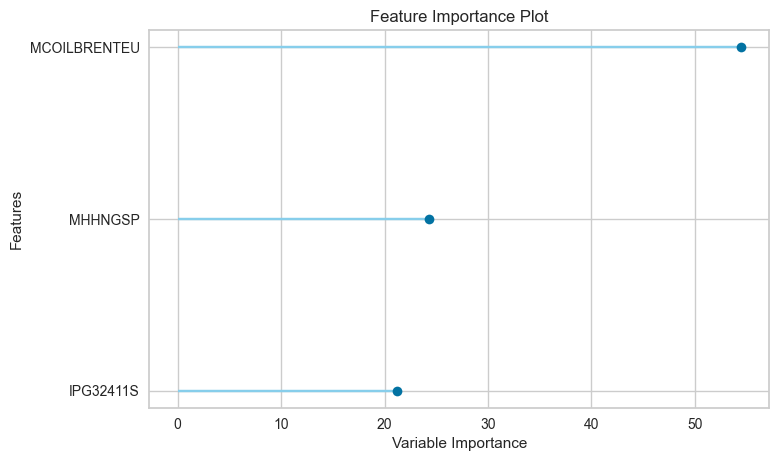

Experiment on Wisconsin


,Description,Value
0,Session id,123
1,Target,Wisconsin
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.2928,3.2351,1.7832,0.7441,0.0981,0.0784,0.1580
catboost,CatBoost Regressor,1.3644,3.3361,1.8138,0.7278,0.1020,0.0836,1.2160
knn,K Neighbors Regressor,1.4948,4.0934,1.9906,0.6815,0.1110,0.0906,0.0360
rf,Random Forest Regressor,1.4857,4.0196,1.9871,0.6814,0.1105,0.0908,0.1560
ada,AdaBoost Regressor,1.6014,4.1329,2.0139,0.6717,0.1151,0.1003,0.0900
lightgbm,Light Gradient Boosting Machine,1.5733,4.1803,2.0316,0.6651,0.1155,0.0967,0.4500
gbr,Gradient Boosting Regressor,1.5753,4.3284,2.0517,0.6565,0.1158,0.0966,0.0860
ridge,Ridge Regression,1.9772,6.6263,2.5484,0.4781,0.1421,0.1214,0.0260
lar,Least Angle Regression,1.9781,6.6260,2.5486,0.4779,0.1420,0.1215,0.0280
lr,Linear Regression,1.9781,6.6260,2.5486,0.4779,0.1420,0.1215,0.0700


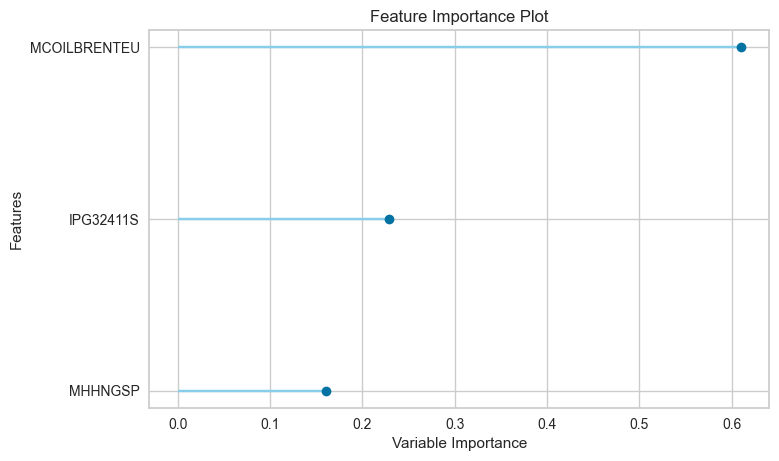

Experiment on Idaho


,Description,Value
0,Session id,123
1,Target,Idaho
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.2830,3.1951,1.7750,0.7357,0.1050,0.0840,0.1660
catboost,CatBoost Regressor,1.3235,3.2187,1.7797,0.7296,0.1083,0.0881,1.3340
rf,Random Forest Regressor,1.4292,3.7149,1.9110,0.6978,0.1147,0.0947,0.1640
knn,K Neighbors Regressor,1.4871,4.0007,1.9619,0.6834,0.1171,0.0966,0.0400
gbr,Gradient Boosting Regressor,1.4848,3.9474,1.9580,0.6798,0.1188,0.0986,0.0760
ada,AdaBoost Regressor,1.6074,4.2208,2.0297,0.6605,0.1237,0.1087,0.1060
lightgbm,Light Gradient Boosting Machine,1.7341,5.0061,2.1950,0.6036,0.1332,0.1143,0.5100
dt,Decision Tree Regressor,1.7320,5.7183,2.3885,0.5150,0.1425,0.1133,0.0300
ridge,Ridge Regression,1.9999,6.6526,2.5544,0.4647,0.1519,0.1318,0.0300
lar,Least Angle Regression,2.0015,6.6537,2.5549,0.4643,0.1519,0.1318,0.0300


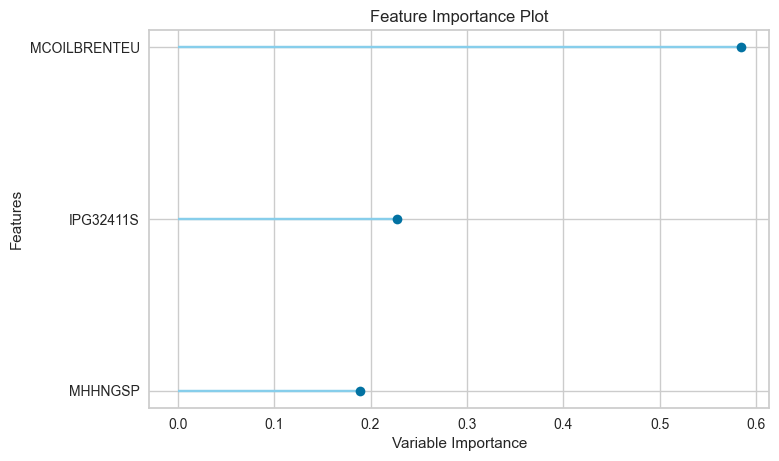

Experiment on Texas


,Description,Value
0,Session id,123
1,Target,Texas
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.1120,2.3539,1.5187,0.7876,0.0822,0.0659,0.1540
catboost,CatBoost Regressor,1.1632,2.4036,1.5316,0.7794,0.0846,0.0697,1.2600
rf,Random Forest Regressor,1.2782,2.8631,1.6750,0.7412,0.0924,0.0767,0.1620
gbr,Gradient Boosting Regressor,1.3452,3.0862,1.7188,0.7258,0.0956,0.0807,0.0740
knn,K Neighbors Regressor,1.3796,3.3841,1.8087,0.6974,0.0999,0.0824,0.0440
ada,AdaBoost Regressor,1.5064,3.5499,1.8729,0.6772,0.1056,0.0921,0.0920
lightgbm,Light Gradient Boosting Machine,1.6466,4.8171,2.1251,0.5905,0.1165,0.0985,0.4980
dt,Decision Tree Regressor,1.6044,4.8026,2.1758,0.5375,0.1208,0.0955,0.0300
huber,Huber Regressor,1.8348,5.8359,2.3764,0.4843,0.1298,0.1093,0.0400
ridge,Ridge Regression,1.8564,5.8517,2.3780,0.4825,0.1300,0.1115,0.0340


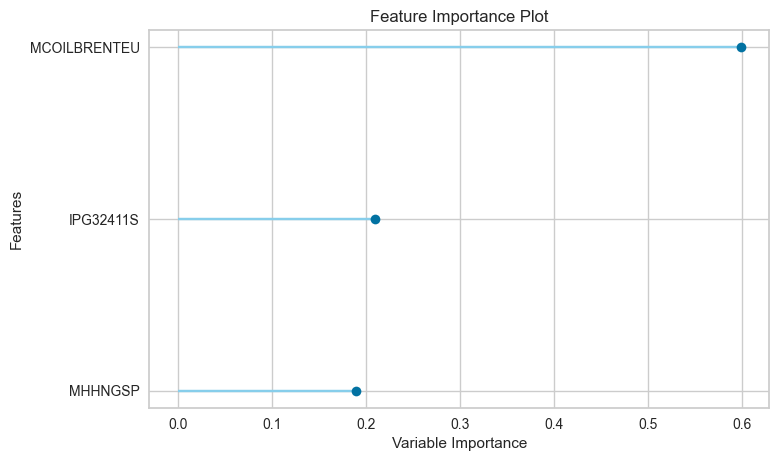

Experiment on New York


,Description,Value
0,Session id,123
1,Target,New York
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.1617,2.4897,1.5489,0.7879,0.0854,0.0696,1.2280
et,Extra Trees Regressor,1.1318,2.5580,1.5834,0.7855,0.0850,0.0669,0.1600
rf,Random Forest Regressor,1.2867,2.9139,1.6910,0.7522,0.0926,0.0769,0.1720
gbr,Gradient Boosting Regressor,1.3088,3.2025,1.7585,0.7296,0.0967,0.0779,0.0680
knn,K Neighbors Regressor,1.4044,3.5611,1.8607,0.7036,0.1013,0.0830,0.0420
lightgbm,Light Gradient Boosting Machine,1.4502,3.5905,1.8802,0.6983,0.1036,0.0865,0.4300
ada,AdaBoost Regressor,1.5674,3.9021,1.9612,0.6700,0.1091,0.0949,0.0900
huber,Huber Regressor,1.8161,5.5406,2.3218,0.5457,0.1262,0.1086,0.0360
ridge,Ridge Regression,1.8199,5.5462,2.3225,0.5453,0.1264,0.1091,0.0300
lar,Least Angle Regression,1.8211,5.5459,2.3225,0.5452,0.1264,0.1092,0.0320


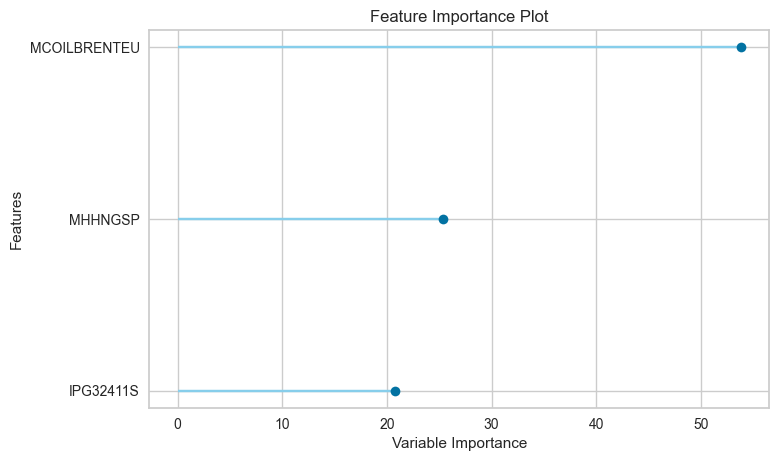

Experiment on Michigan


,Description,Value
0,Session id,123
1,Target,Michigan
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0557,2.1493,1.4472,0.8027,0.0804,0.0646,0.1660
catboost,CatBoost Regressor,1.1172,2.1740,1.4558,0.7958,0.0835,0.0698,1.2420
rf,Random Forest Regressor,1.2432,2.6887,1.6239,0.7509,0.0921,0.0775,0.1800
gbr,Gradient Boosting Regressor,1.2512,2.9143,1.6754,0.7291,0.0951,0.0777,0.0820
knn,K Neighbors Regressor,1.3147,3.0699,1.7300,0.7180,0.0977,0.0809,0.0420
ada,AdaBoost Regressor,1.4277,3.3247,1.8104,0.6919,0.1043,0.0900,0.0920
lightgbm,Light Gradient Boosting Machine,1.4005,3.3075,1.8065,0.6904,0.1027,0.0867,0.4100
dt,Decision Tree Regressor,1.4238,4.5292,2.0863,0.5816,0.1160,0.0882,0.0320
huber,Huber Regressor,1.6835,4.9343,2.1897,0.5488,0.1232,0.1039,0.0360
lar,Least Angle Regression,1.6997,4.9631,2.1950,0.5470,0.1240,0.1055,0.0320


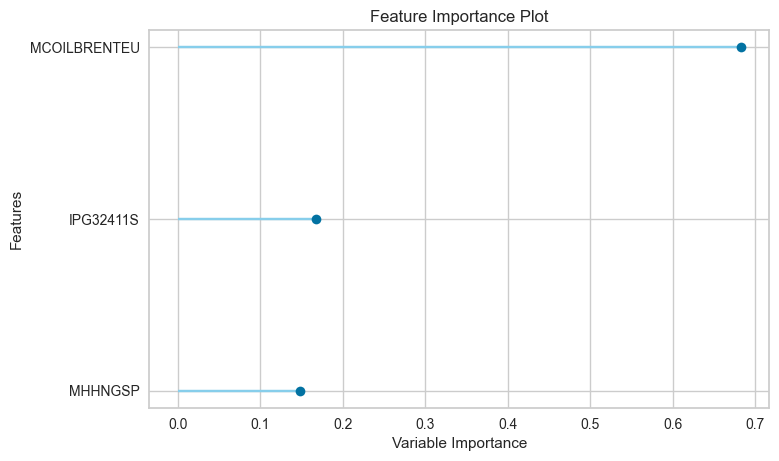

Experiment on Minnesota


,Description,Value
0,Session id,123
1,Target,Minnesota
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.3324,3.5156,1.8566,0.7421,0.1007,0.0799,0.1640
catboost,CatBoost Regressor,1.4202,3.5282,1.8637,0.7353,0.1035,0.0862,1.2580
rf,Random Forest Regressor,1.4900,3.9814,1.9756,0.7102,0.1087,0.0903,0.1640
knn,K Neighbors Regressor,1.5386,4.3598,2.0512,0.6881,0.1127,0.0922,0.0400
gbr,Gradient Boosting Regressor,1.6115,4.5578,2.1132,0.6639,0.1172,0.0973,0.0720
lightgbm,Light Gradient Boosting Machine,1.6482,4.5228,2.1151,0.6628,0.1192,0.1003,0.4880
ada,AdaBoost Regressor,1.7023,4.5804,2.1220,0.6627,0.1199,0.1059,0.0960
dt,Decision Tree Regressor,1.7936,6.3491,2.5162,0.5177,0.1392,0.1097,0.0300
ridge,Ridge Regression,2.0587,7.3574,2.6859,0.4648,0.1474,0.1252,0.0300
lar,Least Angle Regression,2.0609,7.3576,2.6863,0.4645,0.1473,0.1253,0.0320


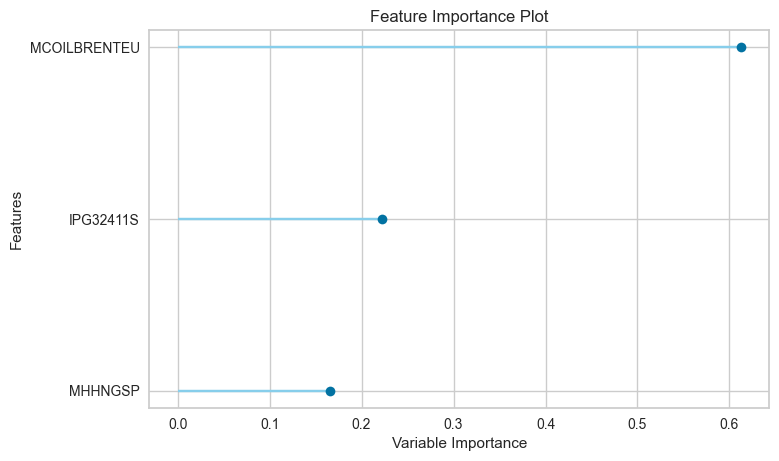

Experiment on Pennsylvania


,Description,Value
0,Session id,123
1,Target,Pennsylvania
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0884,2.2450,1.4859,0.7982,0.0773,0.0617,0.1520
catboost,CatBoost Regressor,1.1513,2.4281,1.5339,0.7791,0.0822,0.0666,1.2440
gbr,Gradient Boosting Regressor,1.2740,2.8931,1.6711,0.7413,0.0886,0.0728,0.0600
rf,Random Forest Regressor,1.2863,2.8572,1.6765,0.7394,0.0885,0.0734,0.1440
knn,K Neighbors Regressor,1.3741,3.3477,1.8080,0.7005,0.0954,0.0783,0.0340
ada,AdaBoost Regressor,1.5045,3.4721,1.8523,0.6852,0.0993,0.0873,0.0840
dt,Decision Tree Regressor,1.4967,4.6999,2.1540,0.5570,0.1136,0.0855,0.0240
huber,Huber Regressor,1.7373,5.0975,2.2283,0.5510,0.1166,0.0992,0.0300
ridge,Ridge Regression,1.7473,5.1291,2.2342,0.5487,0.1171,0.1001,0.0240
lr,Linear Regression,1.7483,5.1287,2.2341,0.5486,0.1171,0.1002,0.0580


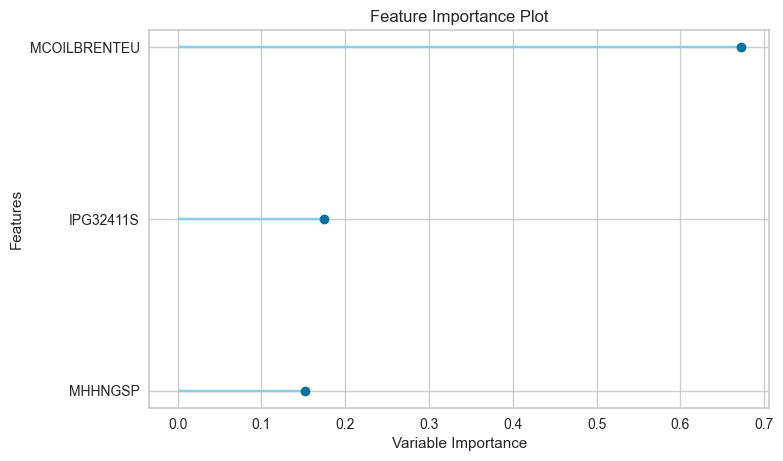

Experiment on New Mexico


,Description,Value
0,Session id,123
1,Target,New Mexico
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0502,2.0833,1.4172,0.7781,0.0845,0.0687,0.1620
catboost,CatBoost Regressor,1.1062,2.1500,1.4455,0.7643,0.0871,0.0725,1.2380
rf,Random Forest Regressor,1.1915,2.5203,1.5693,0.7293,0.0945,0.0784,0.1620
gbr,Gradient Boosting Regressor,1.2384,2.6695,1.5976,0.7159,0.0970,0.0815,0.0660
knn,K Neighbors Regressor,1.2687,2.9215,1.6760,0.6873,0.1008,0.0832,0.0360
ada,AdaBoost Regressor,1.3789,3.0467,1.7318,0.6679,0.1065,0.0921,0.0940
lightgbm,Light Gradient Boosting Machine,1.3604,3.0685,1.7345,0.6631,0.1053,0.0894,0.4500
dt,Decision Tree Regressor,1.5220,4.3678,2.0854,0.5155,0.1232,0.0992,0.0280
huber,Huber Regressor,1.7091,5.0023,2.2030,0.4661,0.1314,0.1119,0.0300
ridge,Ridge Regression,1.7203,5.0255,2.2068,0.4637,0.1319,0.1133,0.0280


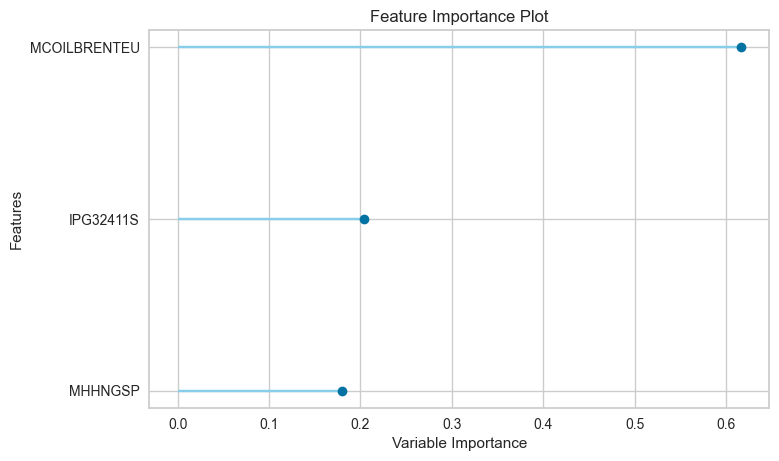

Experiment on Washington


,Description,Value
0,Session id,123
1,Target,Washington
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.1995,2.6473,1.6030,0.7773,0.0916,0.0747,1.2820
et,Extra Trees Regressor,1.1705,2.7369,1.6420,0.7716,0.0910,0.0717,0.1600
rf,Random Forest Regressor,1.3110,3.1782,1.7624,0.7392,0.0997,0.0816,0.1580
gbr,Gradient Boosting Regressor,1.3663,3.4493,1.8205,0.7192,0.1028,0.0841,0.0620
knn,K Neighbors Regressor,1.3969,3.7009,1.8938,0.6968,0.1075,0.0863,0.0340
lightgbm,Light Gradient Boosting Machine,1.4436,3.7004,1.9117,0.6909,0.1094,0.0892,0.4700
ada,AdaBoost Regressor,1.5377,3.7686,1.9239,0.6879,0.1123,0.0982,0.0900
dt,Decision Tree Regressor,1.5893,4.9222,2.2066,0.5684,0.1244,0.0980,0.0260
ridge,Ridge Regression,1.8921,5.9876,2.4106,0.5146,0.1368,0.1186,0.0260
lar,Least Angle Regression,1.8931,5.9871,2.4105,0.5145,0.1367,0.1186,0.0260


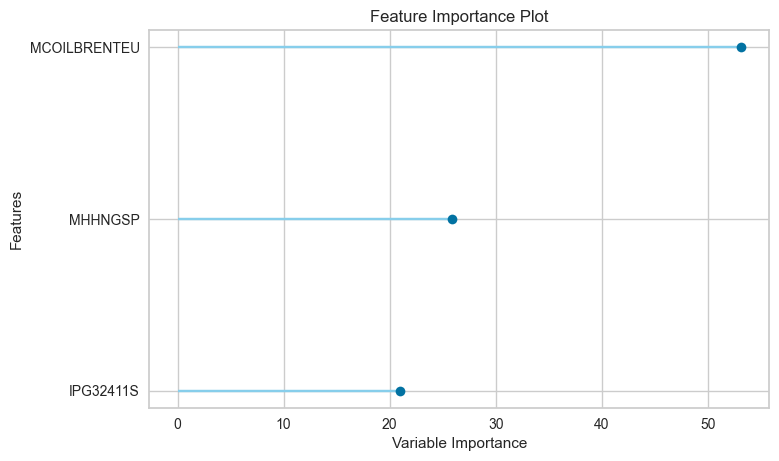

Experiment on US Total


,Description,Value
0,Session id,123
1,Target,US Total
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.1161,2.4069,1.5383,0.7810,0.0859,0.0685,0.1400
catboost,CatBoost Regressor,1.1731,2.4762,1.5554,0.7685,0.0892,0.0731,1.2260
rf,Random Forest Regressor,1.2987,3.0027,1.7148,0.7264,0.0976,0.0808,0.1400
gbr,Gradient Boosting Regressor,1.3478,3.1518,1.7399,0.7175,0.1000,0.0835,0.0580
knn,K Neighbors Regressor,1.3508,3.3291,1.7957,0.7006,0.1018,0.0830,0.0320
ada,AdaBoost Regressor,1.4698,3.5029,1.8560,0.6791,0.1074,0.0932,0.0780
lightgbm,Light Gradient Boosting Machine,1.4509,3.5036,1.8602,0.6767,0.1074,0.0904,0.4020
ridge,Ridge Regression,1.8349,5.6155,2.3394,0.4959,0.1328,0.1147,0.0240
huber,Huber Regressor,1.8321,5.6216,2.3412,0.4957,0.1328,0.1140,0.0280
lar,Least Angle Regression,1.8355,5.6155,2.3395,0.4957,0.1327,0.1147,0.0240


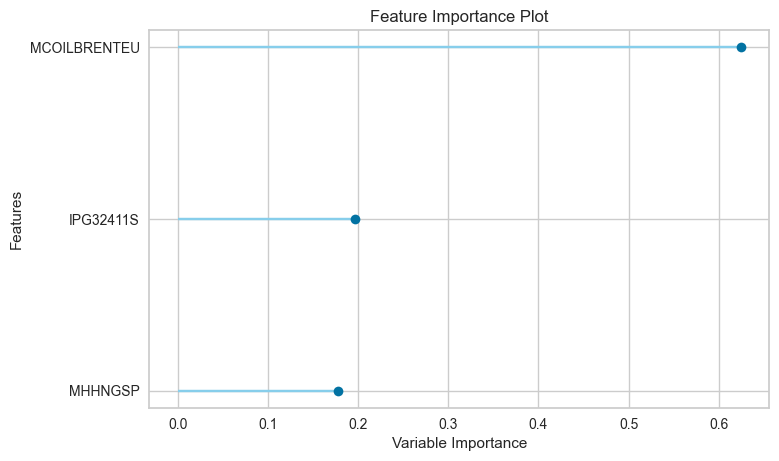

[None, None, None, None, None, None, None, None, None, None, None]

In [4]:
[experiment(US_Milk[s]) for s in US_Milk]

# 4. Experiment on EU countries

Experiment on Germany


,Description,Value
0,Session id,123
1,Target,Germany
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.8618,6.5934,2.5209,0.6149,0.0773,0.0590,0.1560
catboost,CatBoost Regressor,1.8859,6.8135,2.5321,0.5982,0.0786,0.0606,1.3000
rf,Random Forest Regressor,1.9719,7.6575,2.7109,0.5411,0.0832,0.0629,0.1640
knn,K Neighbors Regressor,2.1150,8.5071,2.8435,0.5033,0.0870,0.0673,0.0400
gbr,Gradient Boosting Regressor,2.0704,8.5268,2.8530,0.4846,0.0881,0.0663,0.0700
ada,AdaBoost Regressor,2.2589,8.9691,2.9514,0.4698,0.0913,0.0730,0.1120
lightgbm,Light Gradient Boosting Machine,2.2793,8.9513,2.9283,0.4627,0.0898,0.0728,0.4540
dt,Decision Tree Regressor,2.3385,12.9941,3.5089,0.2351,0.1102,0.0759,0.0300
ridge,Ridge Regression,2.8957,13.8288,3.7056,0.1888,0.1138,0.0926,0.0300
lar,Least Angle Regression,2.8959,13.8330,3.7060,0.1886,0.1138,0.0926,0.0300


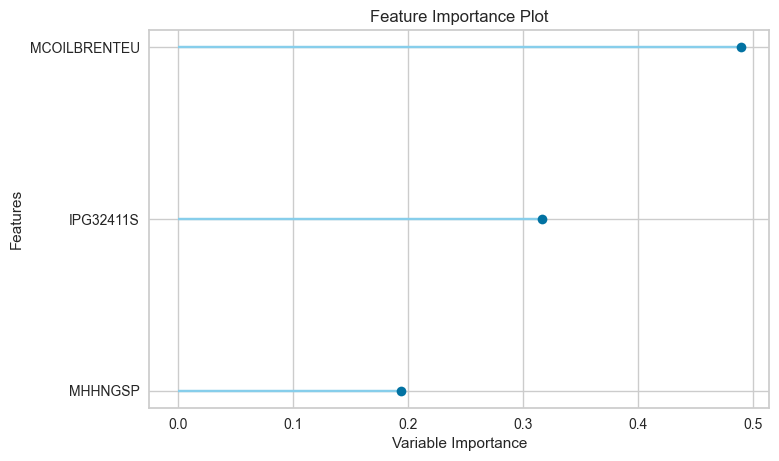

Experiment on France


,Description,Value
0,Session id,123
1,Target,France
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.8029,5.3562,2.2912,0.5026,0.0693,0.0563,0.1660
catboost,CatBoost Regressor,1.8682,5.5755,2.3466,0.4797,0.0714,0.0587,1.2640
rf,Random Forest Regressor,1.9024,5.6529,2.3683,0.4737,0.0722,0.0597,0.1700
knn,K Neighbors Regressor,1.9396,6.0230,2.4351,0.4514,0.0735,0.0605,0.0360
gbr,Gradient Boosting Regressor,1.9390,5.9120,2.4138,0.4490,0.0734,0.0608,0.0680
ada,AdaBoost Regressor,2.0277,6.0095,2.4448,0.4357,0.0741,0.0632,0.0960
lightgbm,Light Gradient Boosting Machine,2.2388,7.7712,2.7497,0.2539,0.0836,0.0704,0.4280
omp,Orthogonal Matching Pursuit,2.4785,9.0097,2.9951,0.1812,0.0898,0.0772,0.0280
br,Bayesian Ridge,2.5077,9.2361,3.0314,0.1624,0.0907,0.0780,0.0300
ridge,Ridge Regression,2.5116,9.2436,3.0323,0.1617,0.0907,0.0781,0.0280


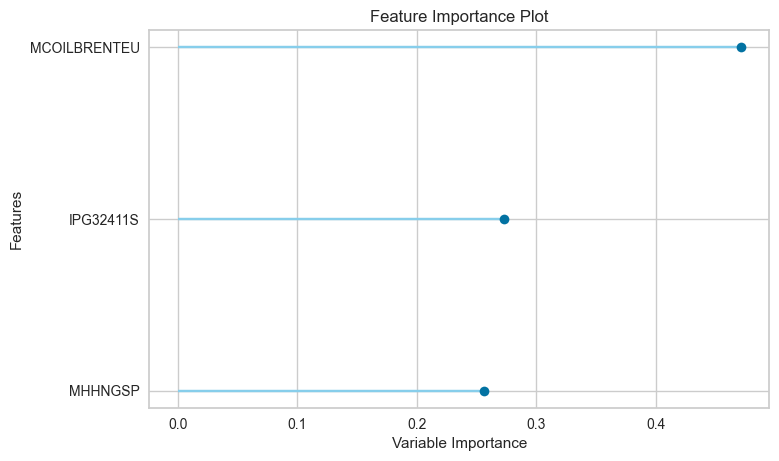

Experiment on Netherlands


,Description,Value
0,Session id,123
1,Target,Netherlands
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,2.2543,9.8901,3.0895,0.5283,0.0921,0.0698,1.4200
et,Extra Trees Regressor,2.2039,10.0028,3.1176,0.5262,0.0930,0.0682,0.1660
knn,K Neighbors Regressor,2.4896,11.0994,3.2794,0.4690,0.0983,0.0775,0.0380
rf,Random Forest Regressor,2.3248,11.0909,3.2630,0.4667,0.0975,0.0722,0.1700
gbr,Gradient Boosting Regressor,2.4083,11.1812,3.2737,0.4630,0.0984,0.0746,0.0680
ada,AdaBoost Regressor,2.6160,11.5118,3.3564,0.4446,0.1009,0.0819,0.0840
lightgbm,Light Gradient Boosting Machine,2.5281,11.6567,3.3440,0.4394,0.1006,0.0794,0.4960
ridge,Ridge Regression,3.2777,16.7341,4.0823,0.2026,0.1218,0.1022,0.0300
lar,Least Angle Regression,3.2792,16.7362,4.0826,0.2024,0.1218,0.1023,0.0320
lr,Linear Regression,3.2792,16.7362,4.0826,0.2024,0.1218,0.1023,0.0660


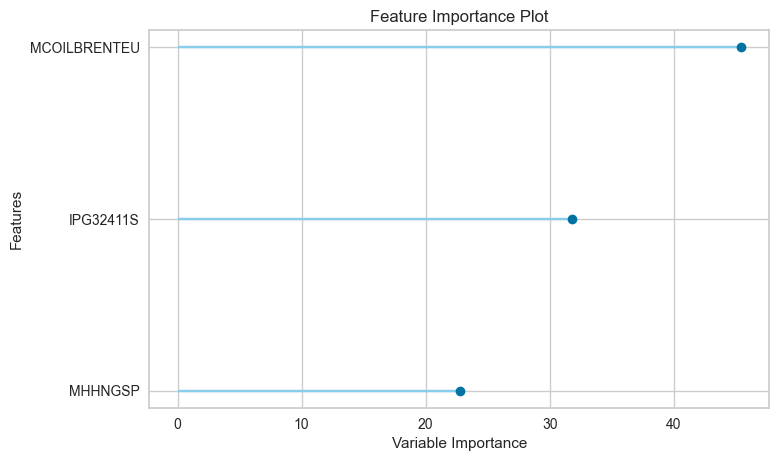

Experiment on Italy


,Description,Value
0,Session id,123
1,Target,Italy
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0870,2.4891,1.5508,0.6187,0.0430,0.0309,0.1700
catboost,CatBoost Regressor,1.1317,2.6575,1.6045,0.5943,0.0445,0.0322,1.3160
knn,K Neighbors Regressor,1.1980,2.9068,1.6540,0.5601,0.0458,0.0341,0.0400
rf,Random Forest Regressor,1.2465,3.0710,1.7409,0.5303,0.0482,0.0353,0.1680
lightgbm,Light Gradient Boosting Machine,1.3494,3.1540,1.7627,0.5151,0.0489,0.0383,0.4460
gbr,Gradient Boosting Regressor,1.2500,3.1748,1.7685,0.5138,0.0492,0.0356,0.0720
ada,AdaBoost Regressor,1.4024,3.1846,1.7719,0.5131,0.0489,0.0396,0.0920
dt,Decision Tree Regressor,1.3757,4.7847,2.1780,0.2780,0.0607,0.0391,0.0320
lar,Least Angle Regression,1.9121,5.7089,2.3848,0.1382,0.0657,0.0541,0.0340
lr,Linear Regression,1.9121,5.7089,2.3848,0.1382,0.0657,0.0541,0.0660


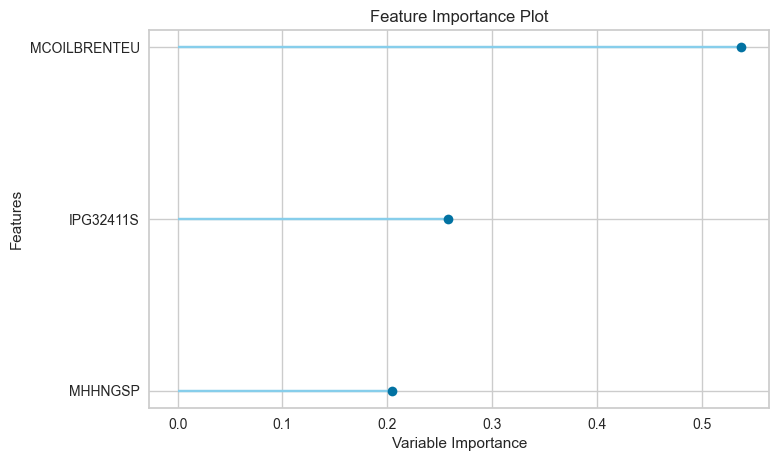

Experiment on Poland


,Description,Value
0,Session id,123
1,Target,Poland
2,Target type,Regression
3,Data shape,"(227, 5)"
4,Train data shape,"(158, 5)"
5,Test data shape,"(69, 5)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.3417,3.4711,1.8531,0.8555,0.0655,0.0493,1.2560
et,Extra Trees Regressor,1.3525,3.6124,1.8891,0.8506,0.0657,0.0495,0.1620
rf,Random Forest Regressor,1.6300,5.1133,2.2345,0.7896,0.0784,0.0598,0.1660
gbr,Gradient Boosting Regressor,1.6810,5.2562,2.2680,0.7808,0.0782,0.0610,0.0620
knn,K Neighbors Regressor,1.6979,5.3643,2.3028,0.7770,0.0781,0.0604,0.0360
ada,AdaBoost Regressor,1.9398,6.0387,2.4416,0.7517,0.0861,0.0723,0.0900
dt,Decision Tree Regressor,1.8241,7.4951,2.7279,0.6919,0.0973,0.0677,0.0320
lightgbm,Light Gradient Boosting Machine,2.6538,12.8000,3.3752,0.4759,0.1163,0.0964,0.4120
br,Bayesian Ridge,3.3225,17.6911,4.1976,0.2987,0.1616,0.1322,0.0300
ridge,Ridge Regression,3.3317,17.6522,4.1916,0.2985,0.1607,0.1318,0.0300


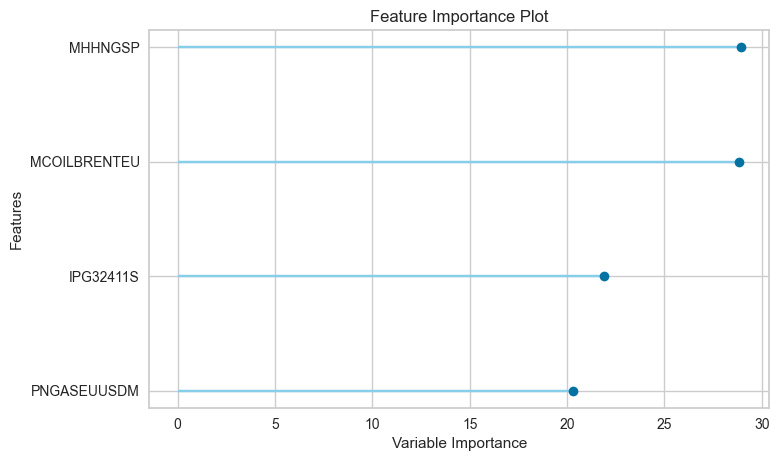

Experiment on Ireland


,Description,Value
0,Session id,123
1,Target,Ireland
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1770,8.8747,2.9609,0.6755,0.0875,0.0680,0.1640
catboost,CatBoost Regressor,2.2714,9.0300,2.9576,0.6702,0.0889,0.0718,1.3600
rf,Random Forest Regressor,2.3481,9.8568,3.1095,0.6327,0.0932,0.0742,0.1600
ada,AdaBoost Regressor,2.6166,11.5169,3.3391,0.5722,0.1004,0.0839,0.0960
knn,K Neighbors Regressor,2.5432,11.9864,3.4246,0.5681,0.1007,0.0796,0.0360
gbr,Gradient Boosting Regressor,2.5386,11.8579,3.4095,0.5630,0.1018,0.0800,0.0700
lightgbm,Light Gradient Boosting Machine,2.5947,12.1896,3.4436,0.5507,0.1024,0.0819,0.4700
dt,Decision Tree Regressor,2.7888,16.9374,4.0727,0.3608,0.1215,0.0884,0.0280
br,Bayesian Ridge,3.2943,18.7090,4.3141,0.3239,0.1269,0.1034,0.0280
ridge,Ridge Regression,3.2948,18.7438,4.3175,0.3230,0.1269,0.1034,0.0260


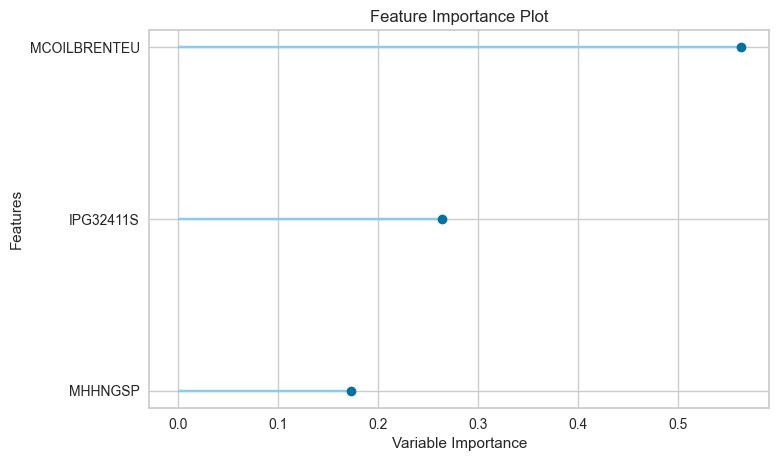

Experiment on Spain


,Description,Value
0,Session id,123
1,Target,Spain
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.0965,2.4043,1.5133,0.7812,0.0452,0.0345,1.2560
gbr,Gradient Boosting Regressor,1.1858,2.5935,1.5743,0.7646,0.0474,0.0376,0.0660
rf,Random Forest Regressor,1.1758,2.6189,1.5931,0.7572,0.0479,0.0371,0.1540
et,Extra Trees Regressor,1.1162,2.6434,1.5978,0.7536,0.0474,0.0351,0.1540
knn,K Neighbors Regressor,1.2960,3.4918,1.8152,0.6820,0.0531,0.0405,0.0380
lightgbm,Light Gradient Boosting Machine,1.3858,3.4055,1.8259,0.6791,0.0544,0.0436,0.4460
ada,AdaBoost Regressor,1.3811,3.2874,1.7987,0.6733,0.0537,0.0439,0.0860
dt,Decision Tree Regressor,1.3706,3.8961,1.9591,0.5906,0.0595,0.0438,0.0280
br,Bayesian Ridge,1.8480,6.6540,2.5510,0.3754,0.0736,0.0575,0.0320
ridge,Ridge Regression,1.8537,6.6716,2.5550,0.3732,0.0738,0.0577,0.0260


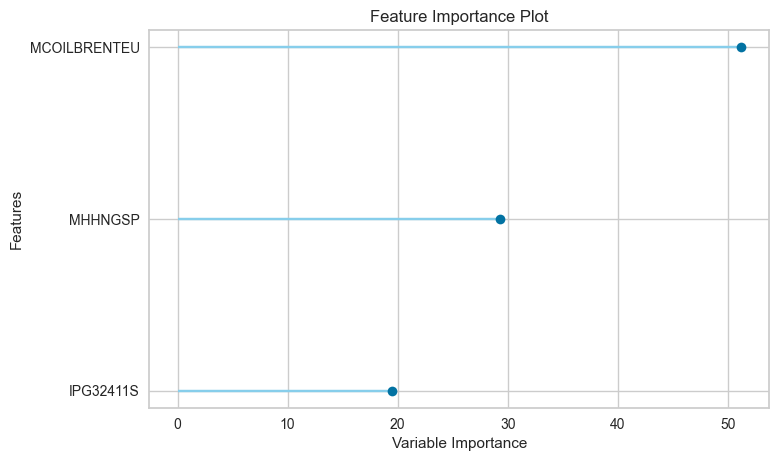

Experiment on Denmark


,Description,Value
0,Session id,123
1,Target,Denmark
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.4599,4.7071,2.0812,0.6264,0.0612,0.0440,1.2460
et,Extra Trees Regressor,1.4508,4.7968,2.1230,0.6208,0.0626,0.0438,0.1640
rf,Random Forest Regressor,1.5025,5.0173,2.1964,0.6008,0.0649,0.0457,0.1680
lightgbm,Light Gradient Boosting Machine,1.6601,5.4490,2.2596,0.5620,0.0666,0.0505,0.4560
gbr,Gradient Boosting Regressor,1.5996,5.5407,2.2923,0.5557,0.0677,0.0484,0.0640
knn,K Neighbors Regressor,1.6526,5.8497,2.3142,0.5361,0.0675,0.0498,0.0340
ada,AdaBoost Regressor,1.8144,5.9860,2.4044,0.5254,0.0709,0.0551,0.0840
dt,Decision Tree Regressor,1.8420,8.3423,2.8153,0.3486,0.0820,0.0567,0.0300
ridge,Ridge Regression,2.5728,10.3871,3.2175,0.1912,0.0932,0.0777,0.0260
lar,Least Angle Regression,2.5744,10.3940,3.2185,0.1906,0.0933,0.0778,0.0280


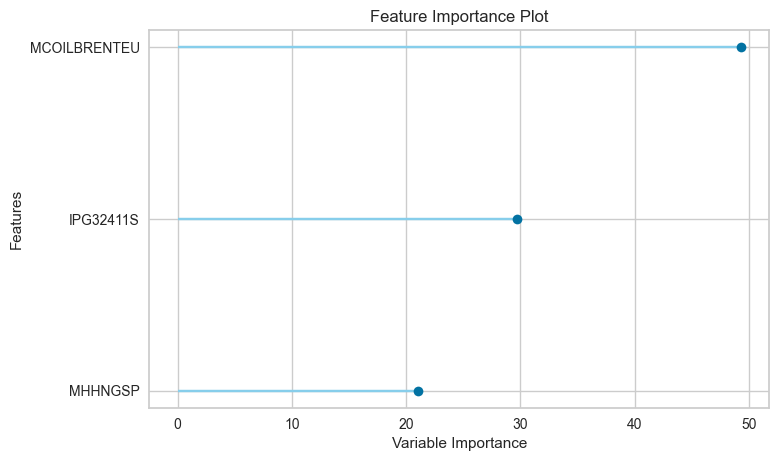

Experiment on Belgium


,Description,Value
0,Session id,123
1,Target,Belgium
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0828,7.3185,2.6747,0.6200,0.0854,0.0689,0.1700
catboost,CatBoost Regressor,2.2534,8.4138,2.8585,0.5606,0.0921,0.0751,1.3400
rf,Random Forest Regressor,2.3138,9.3529,3.0280,0.5002,0.0963,0.0766,0.1680
lightgbm,Light Gradient Boosting Machine,2.5533,10.4160,3.2009,0.4433,0.1021,0.0849,0.4300
ada,AdaBoost Regressor,2.5618,10.7097,3.2506,0.4335,0.1041,0.0858,0.0920
knn,K Neighbors Regressor,2.4858,10.9928,3.2579,0.4300,0.1032,0.0825,0.0360
gbr,Gradient Boosting Regressor,2.4939,10.8643,3.2615,0.4227,0.1032,0.0822,0.0640
dt,Decision Tree Regressor,2.7253,13.4518,3.6045,0.2904,0.1155,0.0896,0.0280
omp,Orthogonal Matching Pursuit,3.2477,15.8661,3.9660,0.1704,0.1247,0.1071,0.0260
ridge,Ridge Regression,3.2704,16.1810,4.0050,0.1535,0.1256,0.1076,0.0260


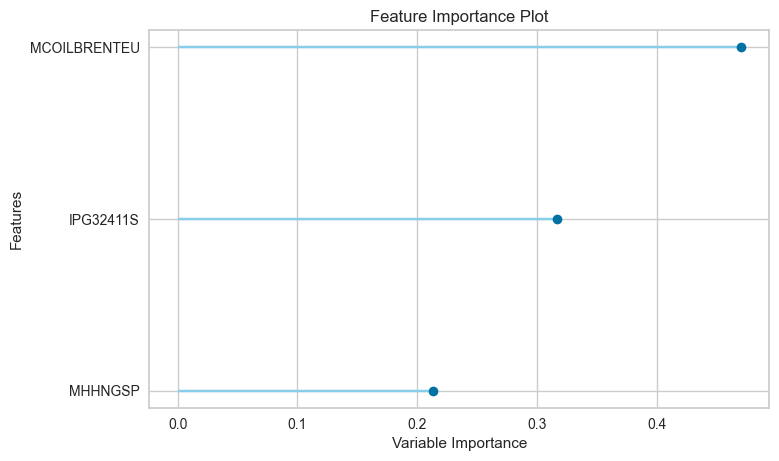

Experiment on Austria


,Description,Value
0,Session id,123
1,Target,Austria
2,Target type,Regression
3,Data shape,"(299, 4)"
4,Train data shape,"(209, 4)"
5,Test data shape,"(90, 4)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.9219,6.8710,2.5800,0.6248,0.0747,0.0578,0.1560
catboost,CatBoost Regressor,1.9601,7.0207,2.5877,0.6163,0.0750,0.0591,1.2380
rf,Random Forest Regressor,2.0513,7.6242,2.7098,0.5789,0.0786,0.0618,0.1560
knn,K Neighbors Regressor,2.2260,8.3993,2.8450,0.5445,0.0818,0.0665,0.0340
gbr,Gradient Boosting Regressor,2.1447,8.5613,2.8647,0.5317,0.0826,0.0647,0.0620
ada,AdaBoost Regressor,2.3384,8.7218,2.9225,0.5235,0.0850,0.0710,0.0720
lightgbm,Light Gradient Boosting Machine,2.3189,8.6008,2.8855,0.5184,0.0839,0.0702,0.4200
br,Bayesian Ridge,2.8595,12.0410,3.4650,0.3398,0.0988,0.0852,0.0260
ridge,Ridge Regression,2.8591,12.0623,3.4682,0.3383,0.0989,0.0852,0.0260
lar,Least Angle Regression,2.8597,12.0702,3.4693,0.3378,0.0989,0.0852,0.0260


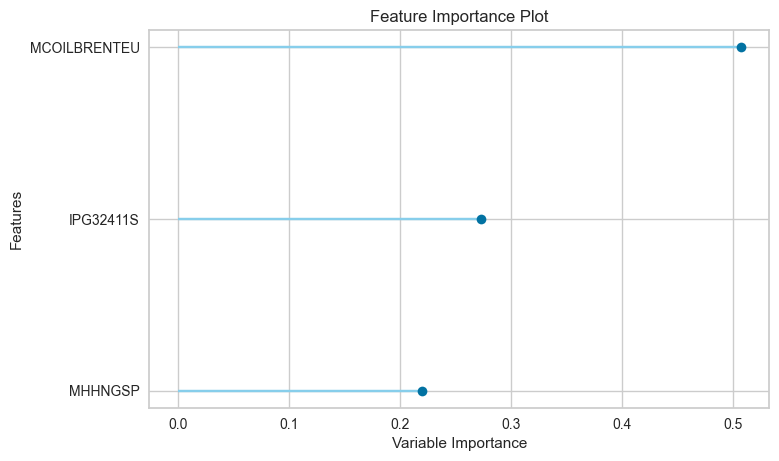

Experiment on EU(without UK)


,Description,Value
0,Session id,123
1,Target,EU(without UK)
2,Target type,Regression
3,Data shape,"(101, 5)"
4,Train data shape,"(70, 5)"
5,Test data shape,"(31, 5)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.0992,2.0238,1.3795,0.7971,0.0409,0.0331,0.8440
et,Extra Trees Regressor,1.1976,2.6950,1.6036,0.7294,0.0486,0.0364,0.1520
gbr,Gradient Boosting Regressor,1.2950,2.8487,1.6516,0.7026,0.0488,0.0389,0.0540
knn,K Neighbors Regressor,1.3490,3.3910,1.7911,0.6557,0.0537,0.0407,0.0340
rf,Random Forest Regressor,1.3970,3.5442,1.8461,0.6205,0.0558,0.0426,0.1520
ada,AdaBoost Regressor,1.4544,3.7726,1.9069,0.5817,0.0575,0.0440,0.0860
dt,Decision Tree Regressor,1.4831,4.4076,2.0028,0.5548,0.0605,0.0454,0.0260
lightgbm,Light Gradient Boosting Machine,1.8250,4.9502,2.2047,0.4631,0.0653,0.0552,0.2120
br,Bayesian Ridge,1.7951,5.3971,2.2805,0.4473,0.0689,0.0552,0.0260
ridge,Ridge Regression,1.8209,5.4488,2.2919,0.4415,0.0692,0.0559,0.0300


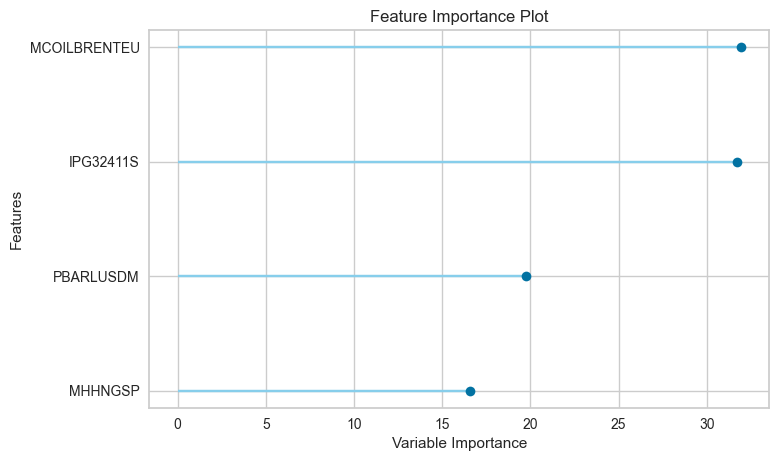

[None, None, None, None, None, None, None, None, None, None, None]

In [5]:
[experiment(EU_Milk[s]) for s in EU_Milk]

# 5. Experiment on China

Experiment on China


,Description,Value
0,Session id,123
1,Target,China
2,Target type,Regression
3,Data shape,"(155, 6)"
4,Train data shape,"(108, 6)"
5,Test data shape,"(47, 6)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,19.8305,888.8094,29.7094,0.5392,0.0900,0.0604,0.1580
catboost,CatBoost Regressor,18.9794,927.1273,30.2314,0.5088,0.0929,0.0585,1.0540
gbr,Gradient Boosting Regressor,22.3785,1220.6903,34.8031,0.3703,0.1067,0.0689,0.0620
lightgbm,Light Gradient Boosting Machine,27.0128,1198.9851,34.4296,0.3517,0.1024,0.0805,0.2960
ada,AdaBoost Regressor,23.6023,1332.7958,36.1970,0.2926,0.1093,0.0719,0.0960
rf,Random Forest Regressor,25.5246,1438.2259,37.6754,0.2615,0.1147,0.0785,0.1620
knn,K Neighbors Regressor,25.9081,1458.2961,37.4526,0.1972,0.1121,0.0771,0.0400
omp,Orthogonal Matching Pursuit,34.0954,2052.8439,44.9234,-0.0150,0.1358,0.1049,0.0300
en,Elastic Net,33.6406,2092.4720,45.4175,-0.0424,0.1368,0.1034,0.0300
llar,Lasso Least Angle Regression,33.1180,2123.7229,45.7509,-0.0592,0.1374,0.1015,0.0320


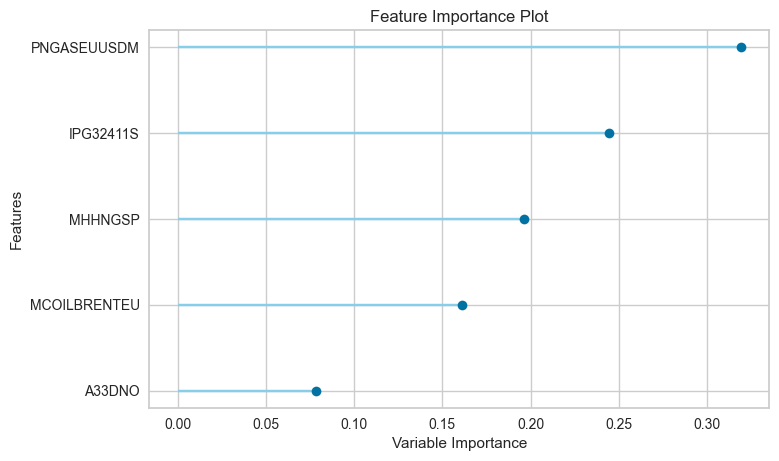

In [6]:
experiment(China_Milk)